#<b>Image Segmentation based on Clustering</b>

Clustering is the task of dividing the population (data points) into a number of groups, such that data points in the same groups are more similar to other data points in that same group than those in other groups. These groups are known as clusters.

One of the most commonly used clustering algorithms is k-means. Here, the k represents the number of clusters (not to be confused with k-nearest neighbor). Let’s understand how k-means works:

1.First, randomly select k initial clusters

2.Randomly assign each data point to any one of the k clusters

3.Calculate the centers of these clusters

4.Calculate the distance of all the points from the center of each cluster

5.Depending on this distance, the points are reassigned to the nearest cluster

6.Calculate the center of the newly formed clusters

7.Finally, repeat steps (4), (5) and (6) until either the center of the clusters does not change or we reach the set number of iterations.

The key advantage of using k-means algorithm is that it is simple and easy to understand. We are assigning the points to the clusters which are closest to them.

In [ ]:

from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

In [2]:
!gdown --id 1VI5_Cubot1QxCoiGAaXn_GjwZDdoiBON

/content/drive/My Drive/Colab Notebooks/Image Segmentation


(192, 263, 3)


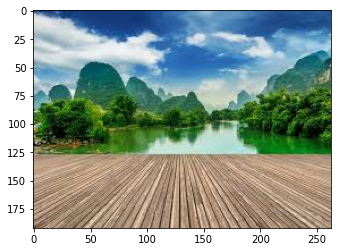

In [4]:
pic = plt.imread('G2aNm.png')  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

It’s a 3-dimensional image of shape (192, 263, 3). For clustering the image using k-means, we first need to convert it into a 2-dimensional array whose shape will be (length*width, channels). In our example, this will be (192 * 263, 3).

In [5]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

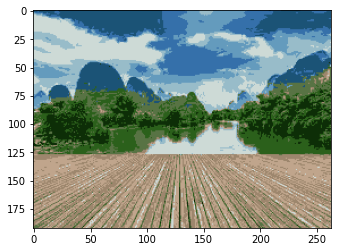

In [11]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

k-means works really well when we have a small dataset. It can segment the objects in the image and give impressive results. But the algorithm hits a roadblock when applied on a large dataset (more number of images).

It looks at all the samples at every iteration, so the time taken is too high. Hence, it’s also too expensive to implement. And since k-means is a distance-based algorithm, it is only applicable to convex datasets and is not suitable for clustering non-convex clusters.